### SMS SPAM CLASSIFICATION

Importing dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df = df.rename(columns = {'v1':'Label', 'v2':'Message'})
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Data Cleaning and preprocessing

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
lemmatizer = WordNetLemmatizer()

In [6]:
text = []

In [7]:
## making everything lowercase and removing puncuation and stopwords
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Message'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    text.append(review)

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

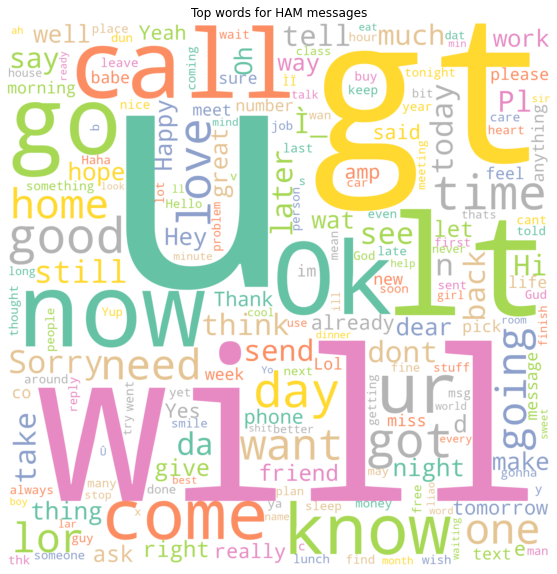

In [9]:
wc_ham = WordCloud(width = 2000, height = 2000, random_state=1, background_color='White', colormap='Set2', 
               collocations=False, stopwords = stopwords).generate(' '.join(text for text in df.loc[df['Label'] == 'ham', 'Message']))
plt.figure(figsize=(10,10))
plt.title('Top words for HAM messages')
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

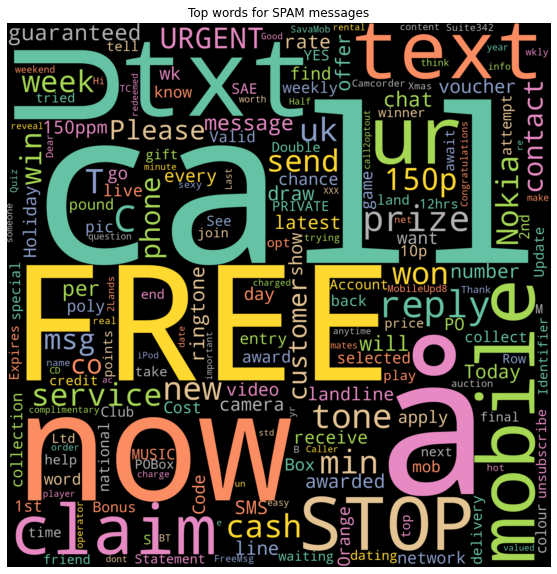

In [10]:
wc_spam = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stopwords).generate(' '.join(text for text in df.loc[df['Label'] == 'spam', 'Message']))
plt.figure(figsize=(10,10))
plt.title('Top words for SPAM messages')
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

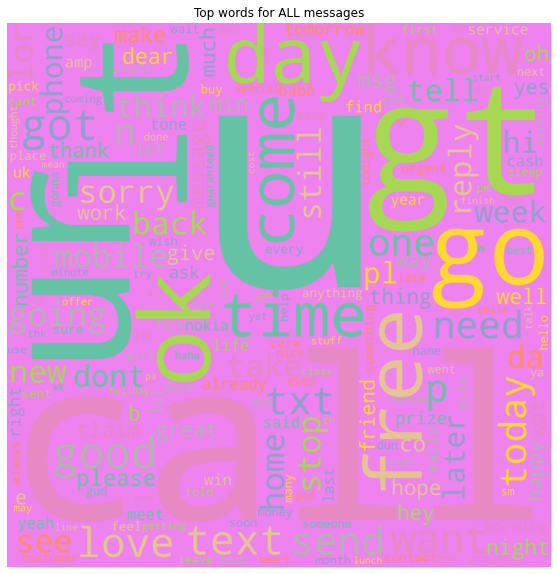

In [11]:
wc_all = WordCloud(width = 2000, height = 2000, random_state=1, background_color='violet', colormap='Set2', 
               collocations=False, stopwords = stopwords).generate(' '.join(text for text in text))
plt.figure(figsize=(10,10))
plt.title('Top words for ALL messages')
plt.imshow(wc_all, interpolation='bilinear')
plt.axis("off")
plt.show()

TF-IDF Vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1000) 
X =  cv.fit_transform(text).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##### Label Encoding 

In [13]:
y = pd.get_dummies(df['Label'])
y = y.iloc[:,1].values 

#### Train Test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Logistic Regression

In [15]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

LogisticRegression()

In [16]:
logreg_pred = logreg.predict(X_test)

In [17]:
print(metrics.classification_report(y_test, logreg_pred))

print(metrics.confusion_matrix(y_test, logreg_pred))

print(accuracy_score(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.97      0.87      0.92       139

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[972   4]
 [ 18 121]]
0.9802690582959641


 ### Support Vector Machine

In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [19]:
svc_pred = svc.predict(X_test)

In [20]:
print(metrics.classification_report(y_test, svc_pred))

print(metrics.confusion_matrix(y_test, svc_pred))

print(accuracy_score(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       1.00      0.93      0.96       139

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115

[[976   0]
 [ 10 129]]
0.9910313901345291


 ### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=31)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=31)

In [22]:
RF_pred = RF.predict(X_test)

In [23]:
print(metrics.classification_report(y_test, RF_pred))

print(metrics.confusion_matrix(y_test, RF_pred))

print(accuracy_score(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.97      0.94      0.95       139

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[972   4]
 [  9 130]]
0.9883408071748879


### SVM gives us the best accuracy.